In [1]:
import tensorflow as tf
# Ensure the use of GPU if available
device = '/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'
print(f"Using device: {device}")


Using device: /GPU:0


In [2]:
import pandas as pd

# Load the filtered data
data = pd.read_csv('filtereddata.txt')

# Split data into input features and labels
input_features = data.iloc[:, :-1]
labels = data.iloc[:, -1]

# Create input_file
input_data = pd.concat([input_features, labels], axis=1)
input_data.to_csv('input_file.csv', index=False)

# Create test_file
test_data = input_features  # Assuming test data has the same structure as input features
test_data.to_csv('test_file.csv', index=False)


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.utils import plot_model


In [4]:
seed = 9
numpy.random.seed(seed)

input_file = "input_file.csv"
test_file = "test_file.csv"

dataset = pd.read_csv(input_file).values
datasetTest = pd.read_csv(test_file).values


In [5]:
X = dataset[:,0:8].astype("int32")
Y = dataset[:,8]
XT = datasetTest[:,0:8].astype("int32")

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

dummy_y = np_utils.to_categorical(encoded_Y)


In [6]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, dummy_y, test_size=0.001, random_state=seed)


In [10]:
# create model
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(3, kernel_initializer='normal', activation='tanh'))
model.add(Dense(3, kernel_initializer='normal', activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 3)                 15        
                                                                 
 dense_6 (Dense)             (None, 3)                 12        
                                                                 
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train, validation_split=0.3, epochs=16, batch_size=128)

# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Epoch 1/16
346/346 [==============================] - 3s 5ms/step - loss: 0.8649 - accuracy: 0.5959 - val_loss: 0.6912 - val_accuracy: 0.7116
Epoch 2/16
346/346 [==============================] - 2s 5ms/step - loss: 0.6587 - accuracy: 0.7132 - val_loss: 0.6420 - val_accuracy: 0.7116
Epoch 3/16
346/346 [==============================] - 1s 4ms/step - loss: 0.6341 - accuracy: 0.7575 - val_loss: 0.6303 - val_accuracy: 0.7691
Epoch 4/16
346/346 [==============================] - 1s 3ms/step - loss: 0.6258 - accuracy: 0.7722 - val_loss: 0.6244 - val_accuracy: 0.7691
Epoch 5/16
346/346 [==============================] - 2s 5ms/step - loss: 0.6205 - accuracy: 0.7722 - val_loss: 0.6197 - val_accuracy: 0.7691
Epoch 6/16
346/346 [==============================] - 2s 5ms/step - loss: 0.5456 - accuracy: 0.7784 - val_loss: 0.3486 - val_accuracy: 0.8812
Epoch 7/16
346/346 [==============================] - 2s 5ms/step - loss: 0.2950 - accuracy: 0.8836 - val_loss: 0.2625 - val_accuracy: 0.8816
Epoch 

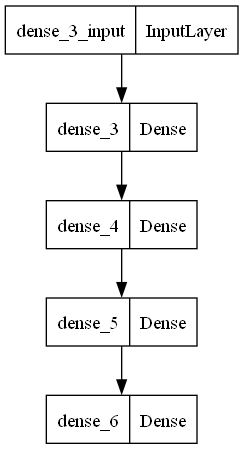

In [12]:
plot_model(model, to_file='model.png')

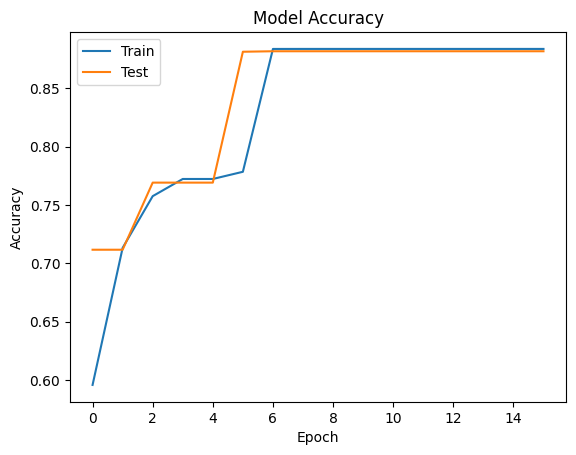

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

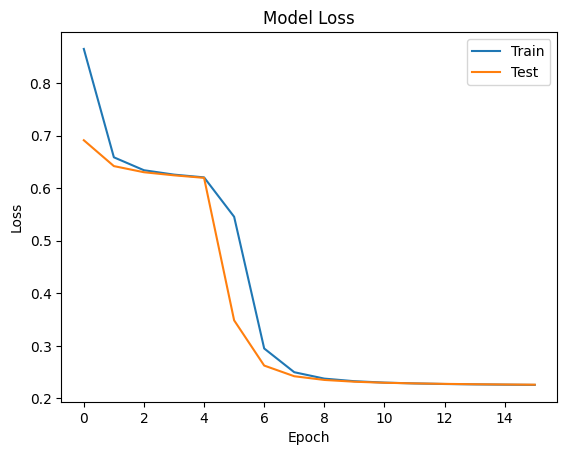

In [14]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()